# Cloud Computing Homework 1: Federated Learning

In [6]:
# import libraries
import h5py
import numpy as np
import os
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

### Important!
We assume that the data directory is created after running the run.sh script and has organized the data with the desired format.
The following code will not work if it is not as such!

In [7]:
def get_subdirs(data_directory):
    folder_name = data_directory
    folder_path = Path(folder_name)
    directories = [str(d)[len(folder_name)+1:] for d in folder_path.iterdir() if d.is_dir()]
    return directories

In [71]:
def get_suffix_files(directory_path, suffix):
    """
    Lists all .log files in the specified directory
    
    Args:
        directory_path (str): Path to the directory
        
    Returns:
        list: List of .log filenames found in the directory
    """
    log_files = []
    
    # Check if directory exists
    if not os.path.isdir(directory_path):
        print(f"Directory {directory_path} does not exist")
        return log_files
    # List all files in directory
    for filename in os.listdir(directory_path):
        if filename.endswith(suffix):
            log_files.append(filename)
    return log_files

def make_name_pretty(filename):
    if 'pruned25' in filename or 'test_25' in filename:
        return '25% pruning'
    elif 'pruned50' in filename or 'test_50' in filename:
        return '50% pruning'
    elif 'pruned75' in filename or 'test_75' in filename:
        return '75% pruning'
    elif 'LeNet' in filename:
        return 'LeNet'
    elif 'ResNet' in filename:
        return 'ResNet'
    elif 'VGG11' in filename:
        return 'VGG11'
    elif 'CNN' in filename:
        return 'CNN'
    elif 'Ditto' in filename or 'ditto' in filename:
        return 'Ditto'
    elif 'fedavg' in filename or 'FedAvg' in filename:
        return 'FedAvg'
    elif 'feddynthread' in filename or 'FedDynThread' in filename:
        return 'FedDynThread'
    elif 'feddyn' in filename or 'FedDyn' in filename:
        return 'FedDyn'
    elif 'moonthreaded' in filename or 'MOONThread' in filename:
        return 'MOONThread'
    elif 'moon' in filename or 'MOON' in filename:
        return 'MOON'
    elif 'pflda' in filename or 'PFL-DA' in filename:
        return 'PFL-DA'
    

In [72]:
def extract_metrics_from_log(filename):
    """
    Extract performance metrics from a federated learning log file.
    
    Args:
        filename: Path to the log file
        
    Returns:
        dict: Contains averaged_time_per_iteration, used_memory_mb, and total_time_cost_seconds
    """
    metrics = {}
    
    with open(filename, 'r') as f:
        lines = f.readlines()
        
        # Extract averaged time per iteration
        for i, line in enumerate(lines):
            # print(line)
            if ("Average time cost per round" in line) and i + 1 < len(lines):
                metrics['averaged_time_per_iteration'] = float(lines[i + 1].strip())
            elif "Averaged time per iteration" in line and i+1 < len(lines):
                metrics['averaged_time_per_iteration']= float(lines[i + 1].strip())
                
                
        # Extract used memory
        for line in lines:
            if "Used Memory:" in line:
                # Convert "278.22M" to 278.22
                try:
                    memory_str = line.split("Used Memory:")[1].strip().split('M')[0]
                    metrics['used_memory_mb'] = float(memory_str)
                except:
                    memory_str = line.split("Used Memory:")[1].strip().split('G')[0]
                    metrics['used_memory_mb'] = float(memory_str)
                
                
        # Extract total time cost
        for line in lines:
            if "Total time cost:" in line:
                # Convert "30.09s" to 30.09
                time_str = line.split("Total time cost:")[1].strip().split('s')[0]
                metrics['total_time_cost_seconds'] = float(time_str)
    
    return metrics

def extract_h5_stats(file):
    with h5py.File(file, 'r') as f:
        acc = f['rs_test_acc'][:]
        loss = f['rs_train_loss'][:]
    return acc, loss

In [73]:
def get_data(directories,data_directory):
    metrics_bunch = {}
    acc_table = {}
    loss_table = {}
    for i in directories:
        acc_bunch = {}
        loss_bunch = {}
        table_bunch = {}
        for j in (get_suffix_files(f'{data_directory}/{i}', '.log')):
            name = make_name_pretty(j)
            table_bunch[name] = extract_metrics_from_log(f"{data_directory}/{i}/{j}")
        for j in get_suffix_files(f'{data_directory}/{i}','.h5'):
            #if i == 'compression comparison': print(make_name_pretty(j))
            name = make_name_pretty(j)
            acc_bunch[name], loss_bunch[name] = extract_h5_stats(f'{data_directory}/{i}/{j}')
            #if i == 'compression comparison': print(acc_bunch[make_name_pretty(j)])
            if name == 'Ditto':
                # print(acc_bunch[name])
                tmp1 = list(acc_bunch[name])[::2]
                tmp2 = list(loss_bunch[name])[::2]
                acc_bunch[name] = tmp1
                loss_bunch[name] = tmp2
        metrics_bunch[f'{i}'] = table_bunch
        acc_table[i] = acc_bunch
        loss_table[i] = loss_bunch
    return metrics_bunch, acc_table, loss_table



# Usage: 
data_directory = 'results_archive'
directories = get_subdirs(data_directory)
metrics_bunch, acc_table, loss_table = get_data(directories,data_directory)
print(acc_table['Cifar Model Comparison'])
# metrics_bunch, acc_table, loss_table = get_data()

def display_save_data_metrics(directories, metrics_bunch,dir_num,  save_dir, save=False):
    dir_num = directories[dir_num]
    table = metrics_bunch[dir_num]
    df = pd.DataFrame(table)
    print(dir_num)
    print(df, '\n')
    if save: df.to_csv(f'{save_dir}/{dir_num}')
        

{'CNN': array([0.09526982, 0.11039307, 0.14990007, 0.16195869, 0.13411059,
       0.17075283, 0.17421719, 0.19387075, 0.18101266, 0.18241173,
       0.21538974, 0.21738841, 0.25236509, 0.2248501 , 0.19473684,
       0.2431046 , 0.23437708, 0.2502998 , 0.2904064 , 0.28667555,
       0.29833444, 0.26089274, 0.27781479, 0.2407062 , 0.29000666,
       0.29227182, 0.32171885, 0.24936709, 0.29573618, 0.29320453,
       0.29093937, 0.31299134, 0.29260493, 0.35069953, 0.34270486,
       0.3526982 , 0.25169887, 0.30586276, 0.35323118, 0.28927382,
       0.30679547, 0.35176549, 0.31512325, 0.36662225, 0.35709527,
       0.351499  , 0.36628914, 0.37075283, 0.31652232, 0.32631579,
       0.35203198]), 'LeNet': array([0.09780147, 0.12411726, 0.22385077, 0.14916722, 0.10213191,
       0.11685543, 0.16315789, 0.32798135, 0.28007995, 0.11092605,
       0.26775483, 0.29606929, 0.19926716, 0.08281146, 0.23657562,
       0.17435043, 0.22871419, 0.31332445, 0.26169221, 0.32358428,
       0.15409727, 0.185

In [74]:
# Plotting
def plot_graph(directories,dir_num,acc_table,loss_table, save=False, save_dir=Path('plots')): 
    dir_num = directories[dir_num]
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns
    
    for i in loss_table[dir_num].keys():
        Y = loss_table[dir_num][i]
        n = len(Y)
        X = np.linspace(0,n-1,n)
        ax1.plot(X, Y, label = i)
    for j in acc_table[dir_num].keys():
        Y = acc_table[dir_num][j]
        ax2.plot(X, Y, label = j)
    
    # # Add labels and title
    ax1.set_xlabel('Rounds')
    ax1.set_ylabel(f'Loss')
    ax1.set_title(f'Plot Loss Vs Rounds')
    ax1.legend()  # Show legend

    ax2.set_xlabel('Rounds')
    ax2.set_ylabel(f'Accuracy')
    ax2.set_title(f'Plot Accuracy Vs Rounds')
    ax2.legend()  # Show legend

    plt.suptitle(f'Test for {dir_num}')
    plt.tight_layout()
    if save:
        plt.savefig(save_dir / f'{dir_num}.png',dpi=300, bbox_inches='tight')
    plt.show()

def compare_parameter(param, algo,acc_table, loss_table, save_dir=Path('plots'),save=False):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
    for i in loss_table.keys():
        if param in i:
            Y = loss_table[i][algo]
            n = len(Y)
            X = np.linspace(0,n-1,n)
            ax1.plot(X, Y, label=i)
            Y = acc_table[i][algo]
            n = len(Y)
            X = np.linspace(0,n-1,n)
            ax2.plot(X,Y, label=i)
    ax1.set_xlabel('Rounds')
    ax1.set_ylabel(f'Loss')
    ax1.set_title(f'Plot Loss Vs Rounds')
    ax1.legend()  # Show legend

    ax2.set_xlabel('Rounds')
    ax2.set_ylabel(f'Accuracy')
    ax2.set_title(f'Plot Accuracy Vs Rounds')
    ax2.legend()  # Show legend

    plt.suptitle(f'Test for {param} ({algo} algorithm)')
    plt.tight_layout()

    if save:
        plt.savefig(save_dir/ f'{param}.png',dpi=300, bbox_inches="tight")
    plt.show()
    

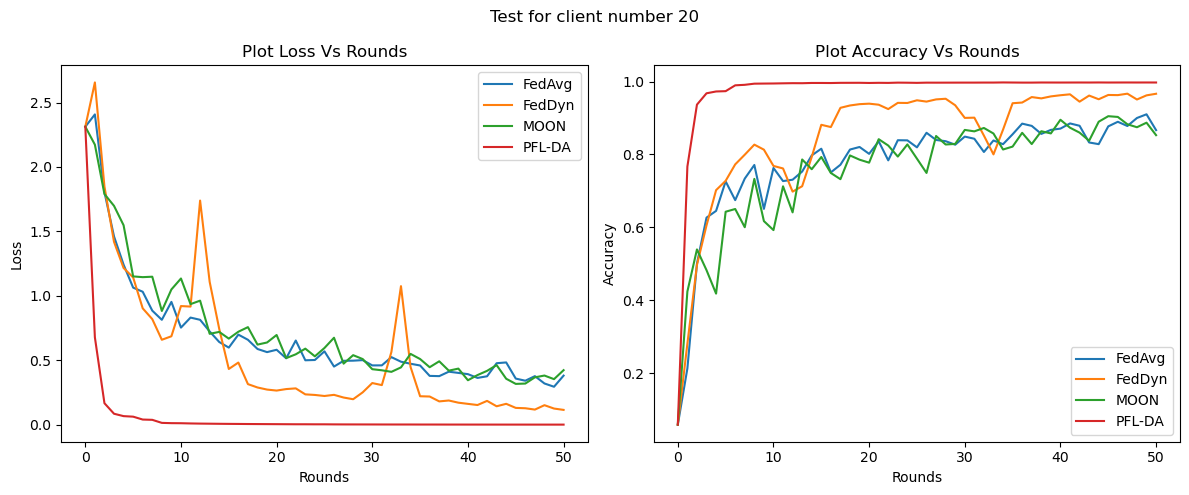

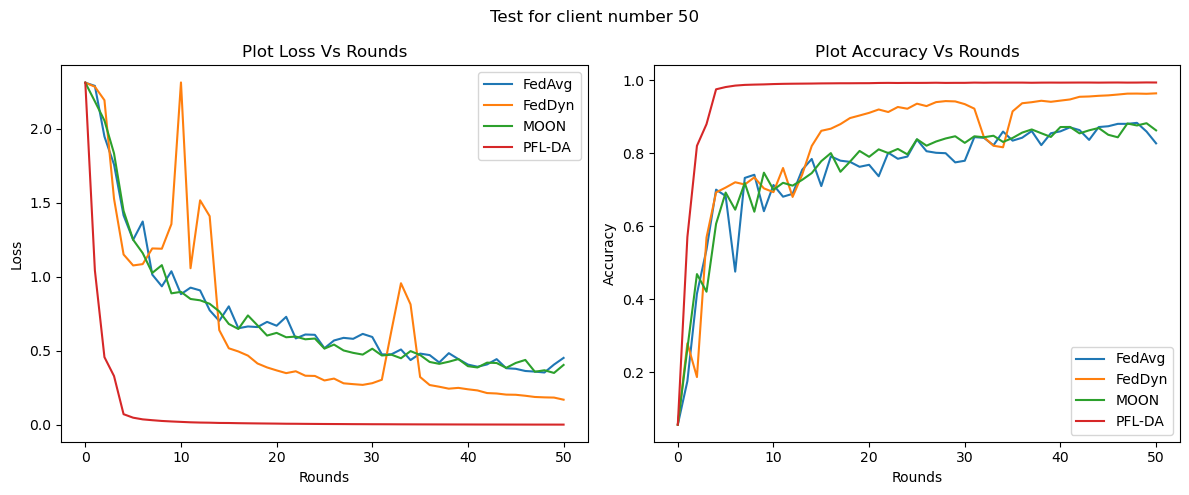

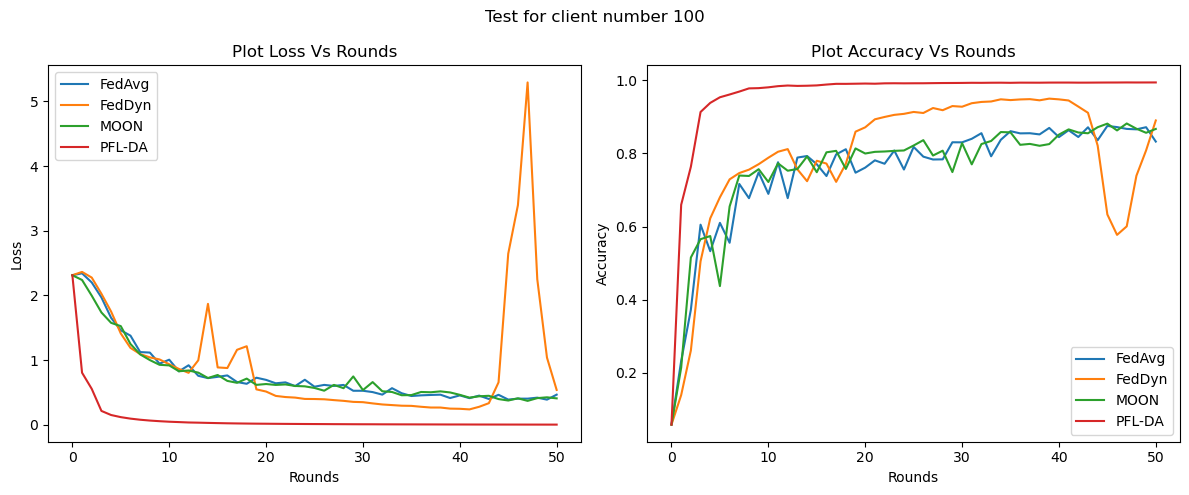

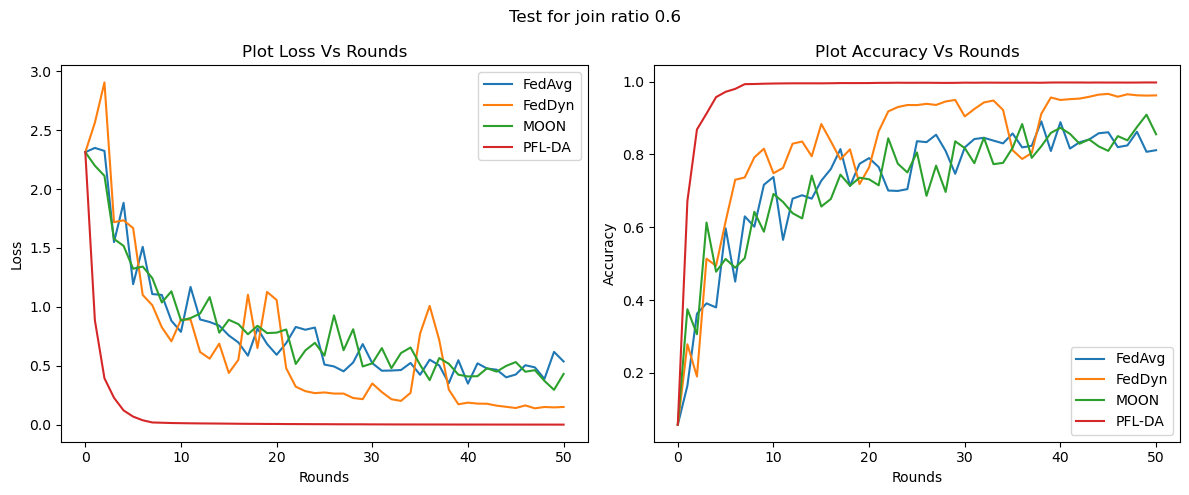

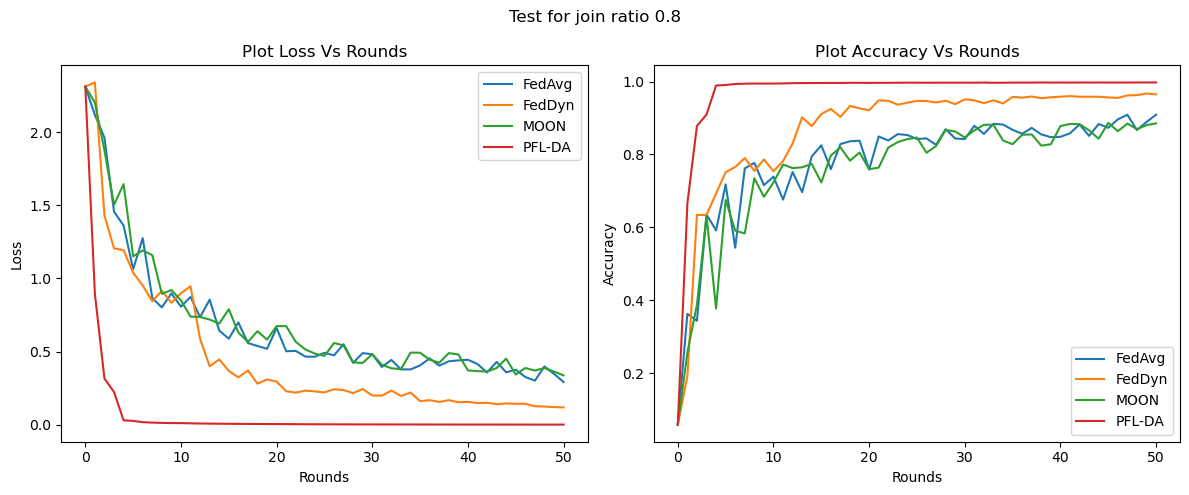

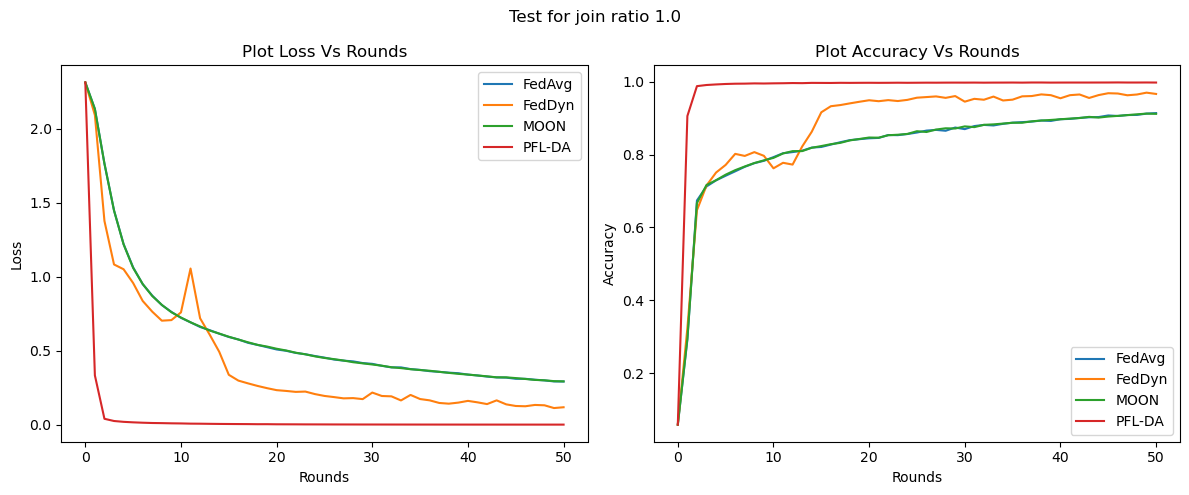

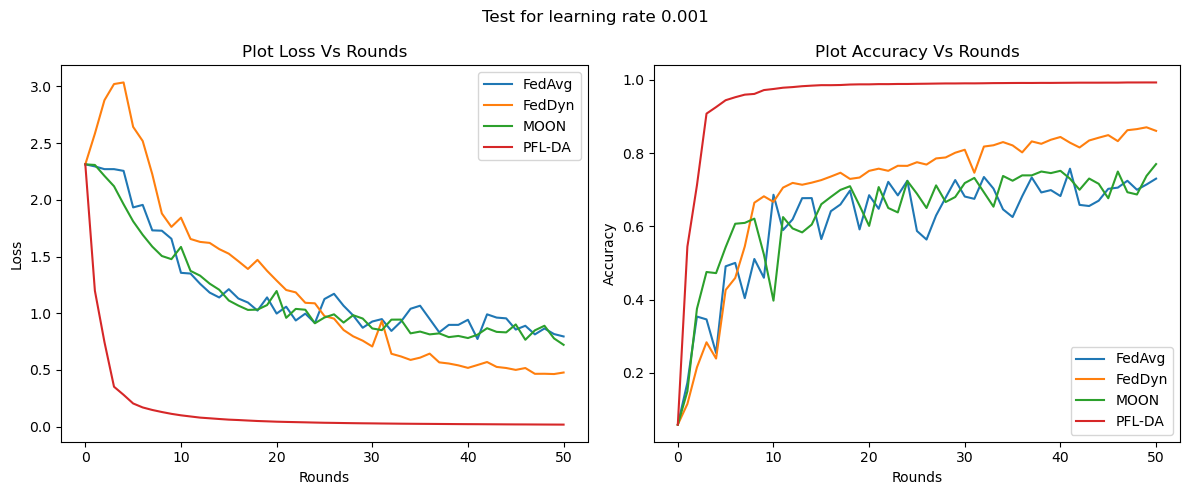

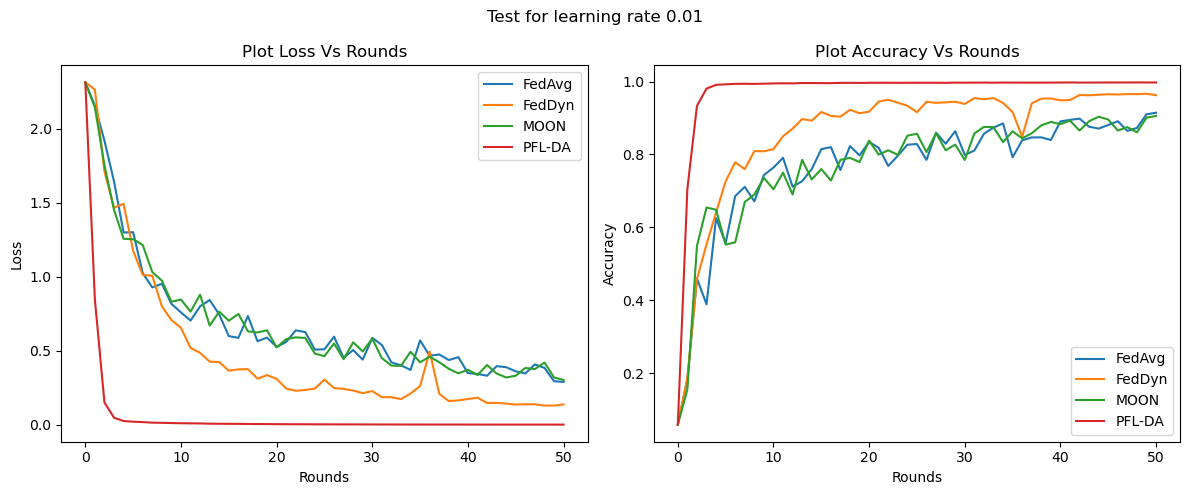

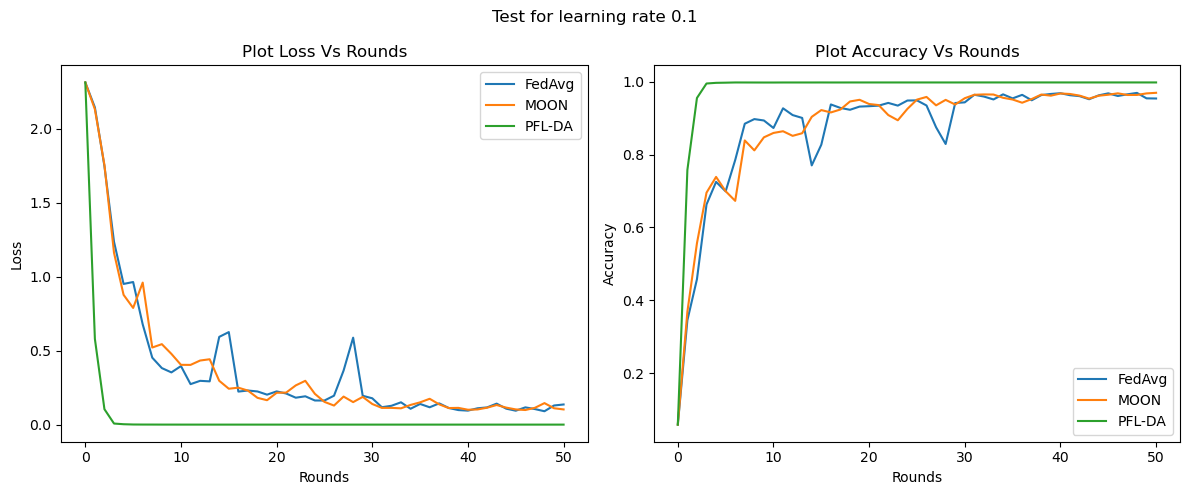

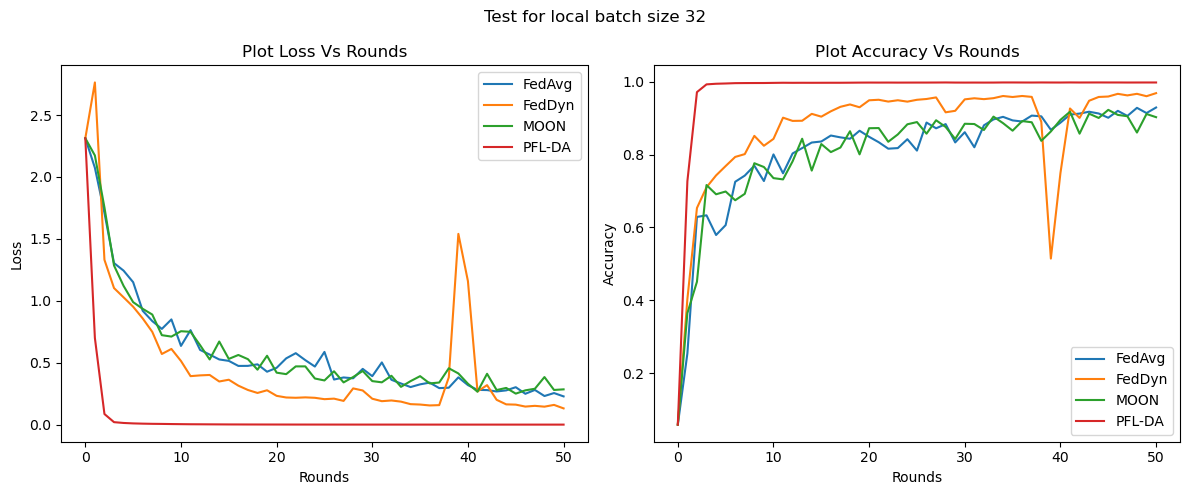

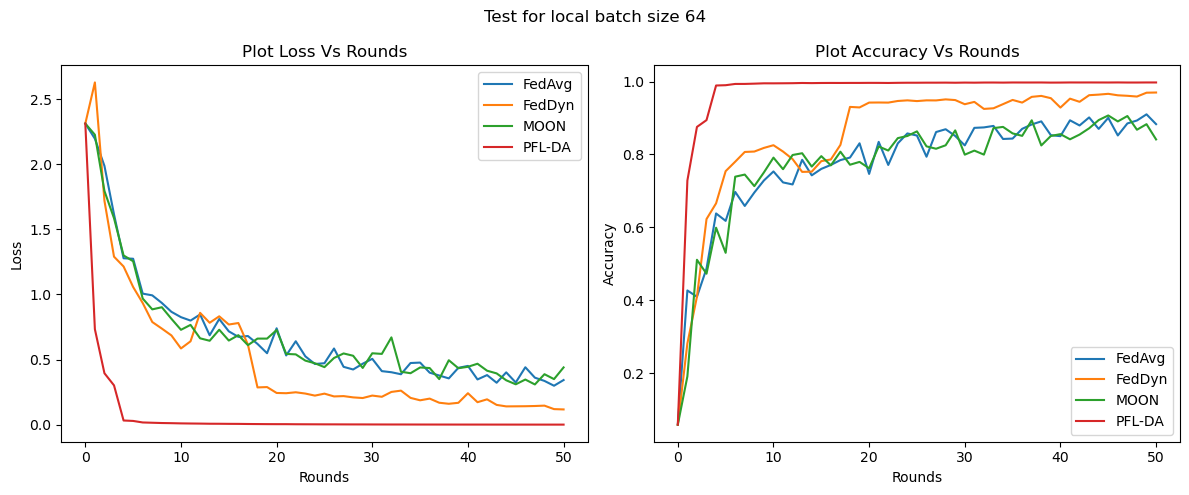

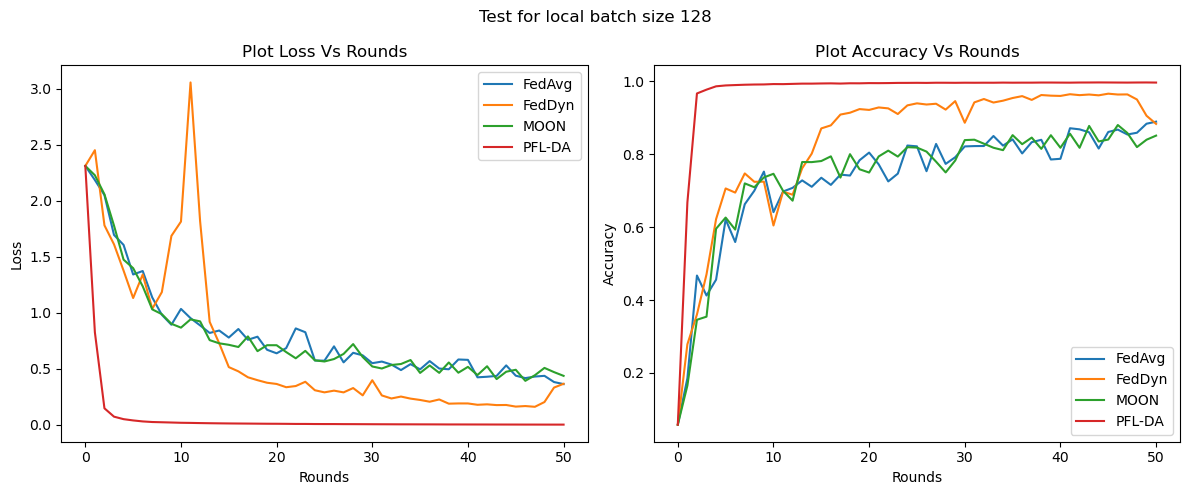

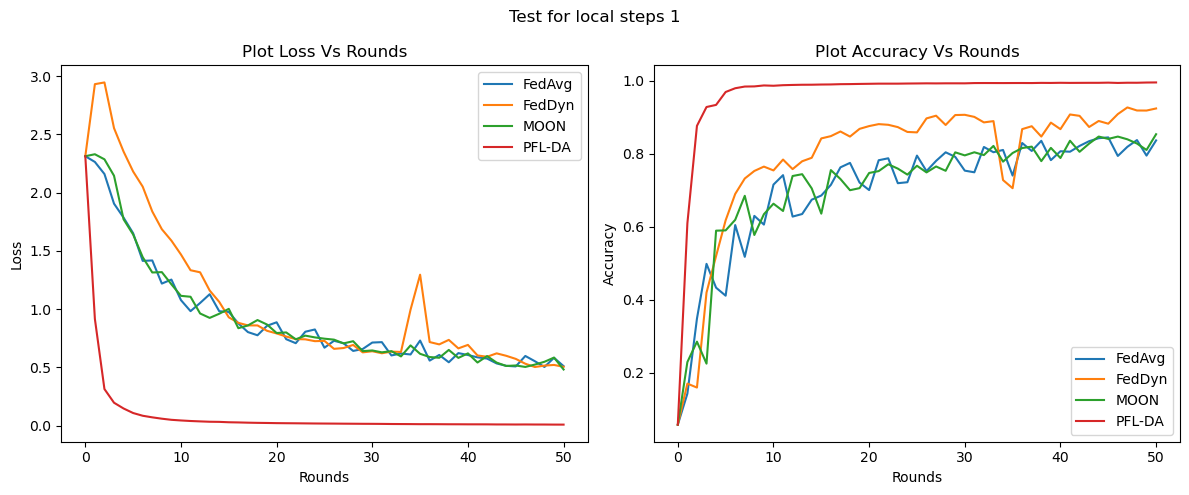

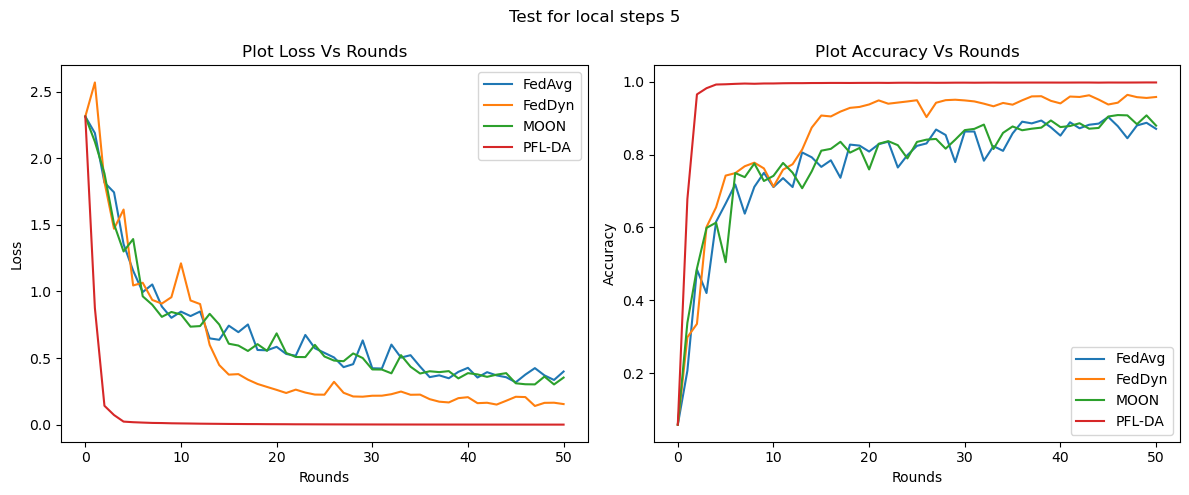

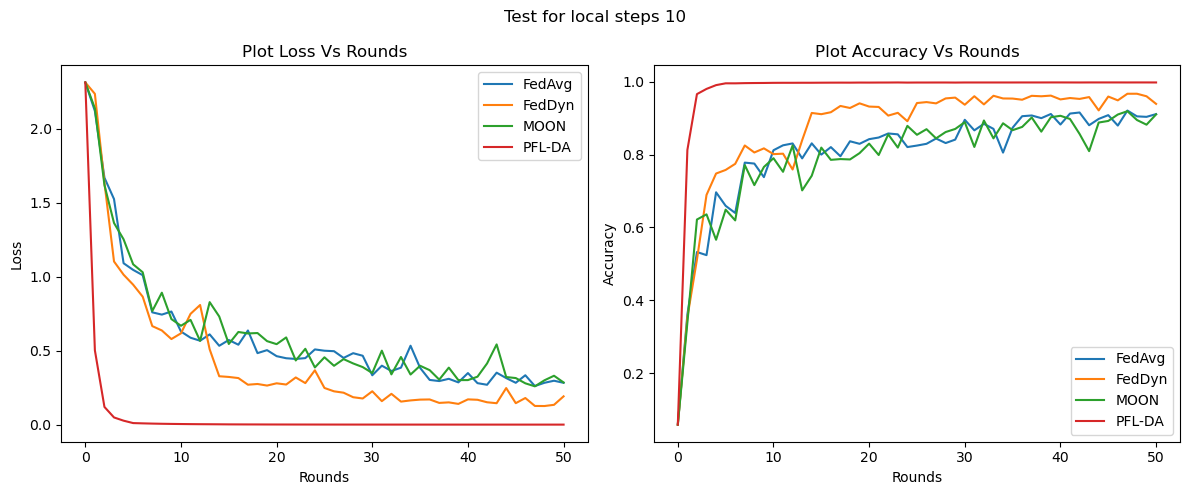

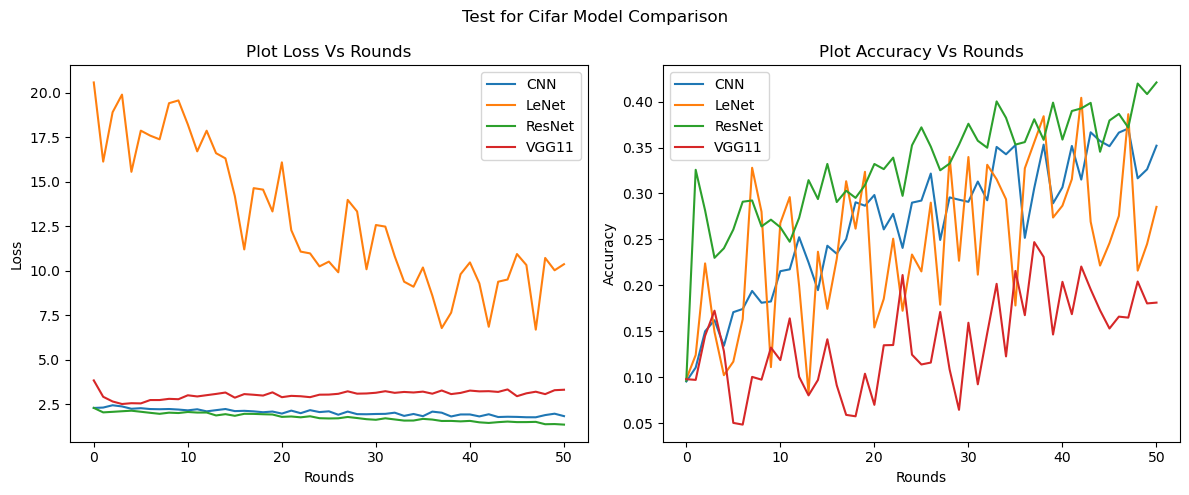

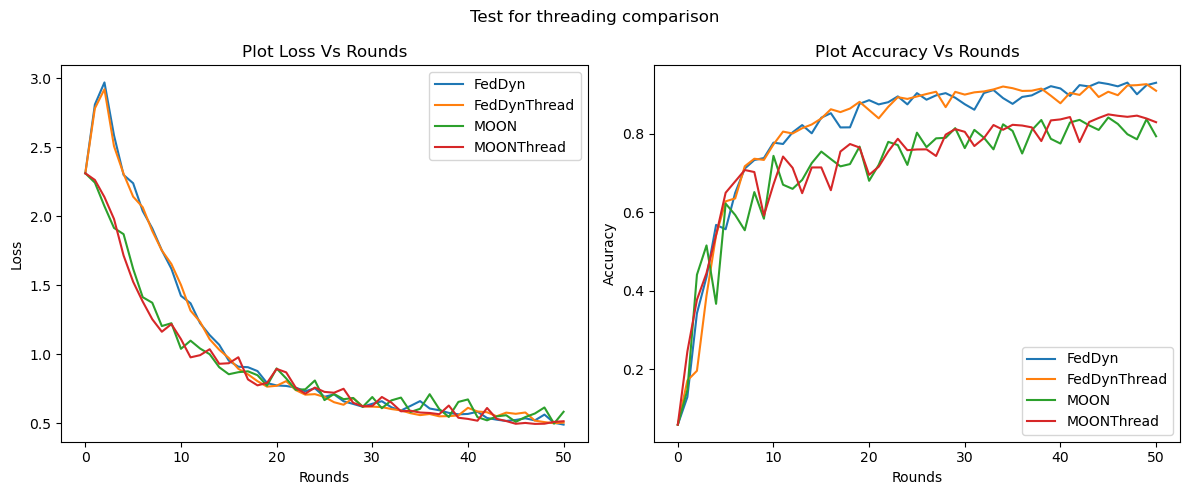

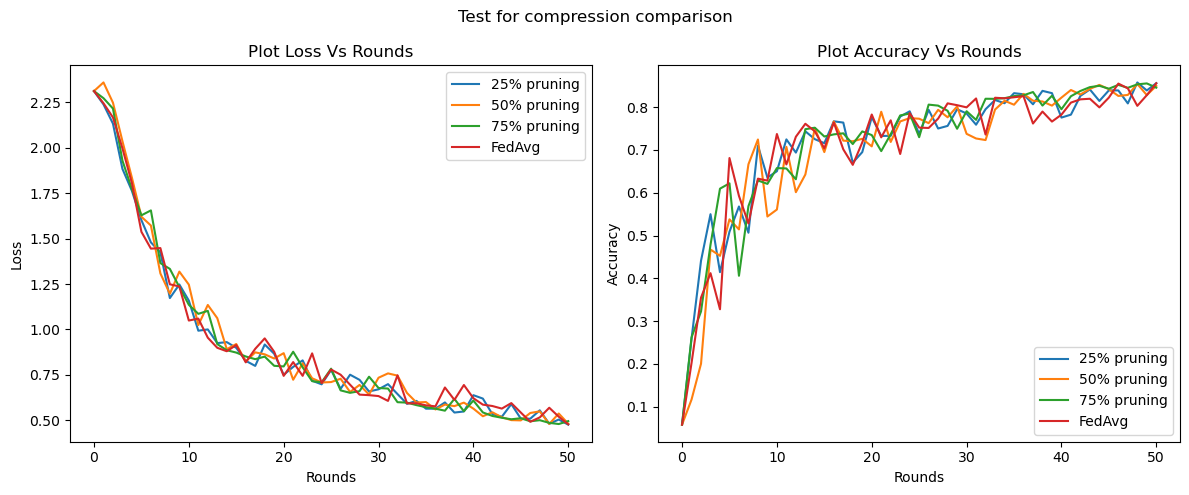

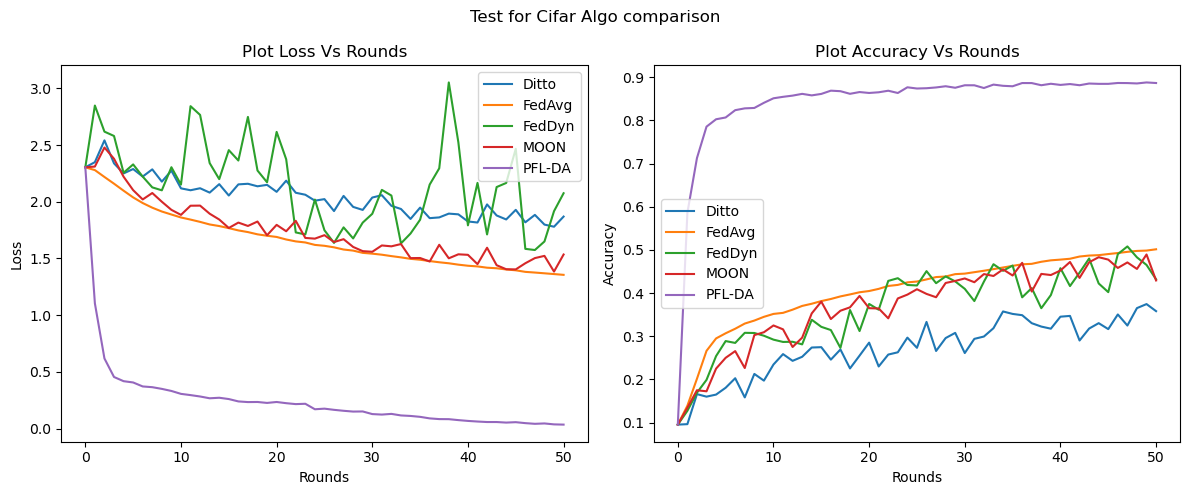

client number 20
                                 FedAvg      FedDyn       MOON      PFL-DA
averaged_time_per_iteration    5.971664    7.339484   10.94747    9.140639
used_memory_mb                93.310000  184.360000  139.97000   91.510000
total_time_cost_seconds      304.410000  376.000000  559.73000  467.270000 

client number 50
                                 FedAvg      FedDyn        MOON      PFL-DA
averaged_time_per_iteration    5.852696    7.165603   11.292435    8.760656
used_memory_mb               226.610000  450.900000  339.920000  225.410000
total_time_cost_seconds      299.840000  367.250000  577.650000  447.020000 

client number 100
                                FedAvg      FedDyn        MOON      PFL-DA
averaged_time_per_iteration    5.82482    7.108311   10.906902    9.010555
used_memory_mb               448.78000  895.140000  673.170000  448.580000
total_time_cost_seconds      297.34000  363.800000  557.830000  460.430000 

join ratio 0.6
                       

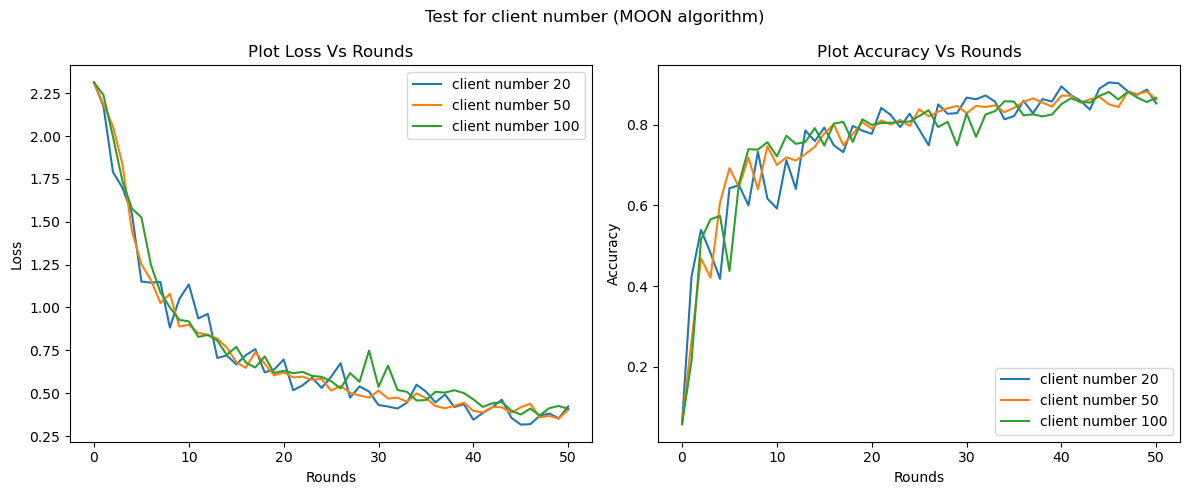

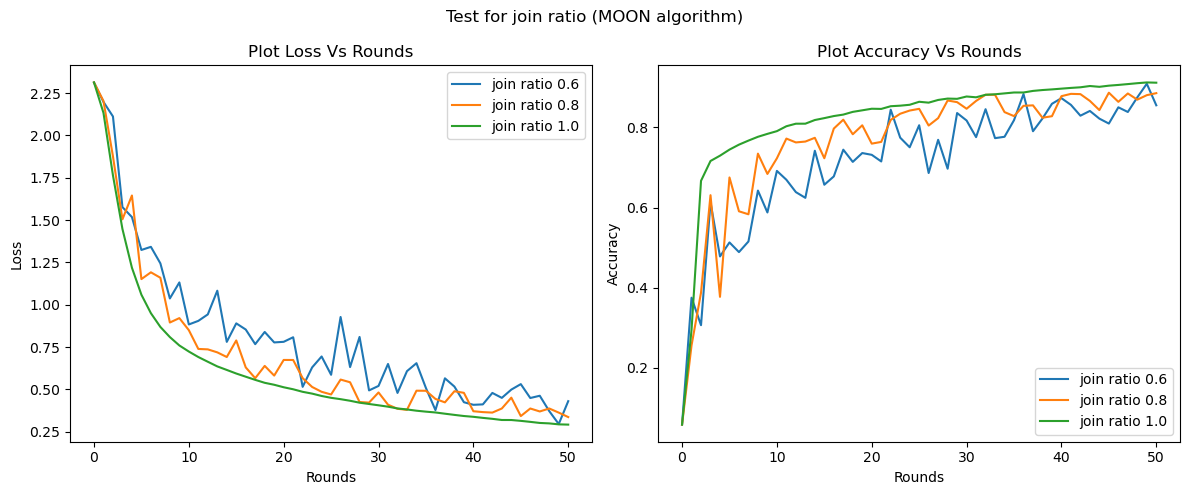

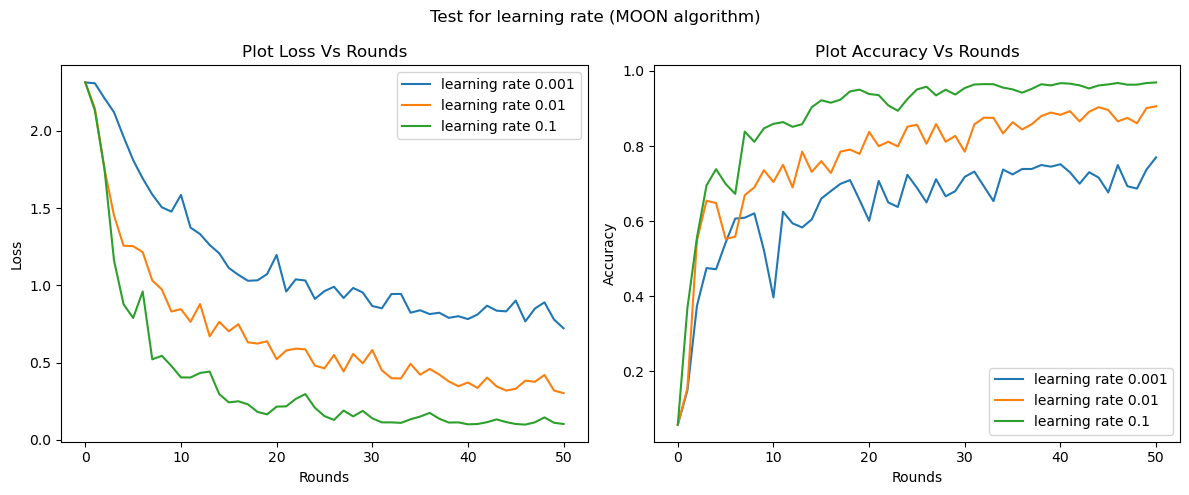

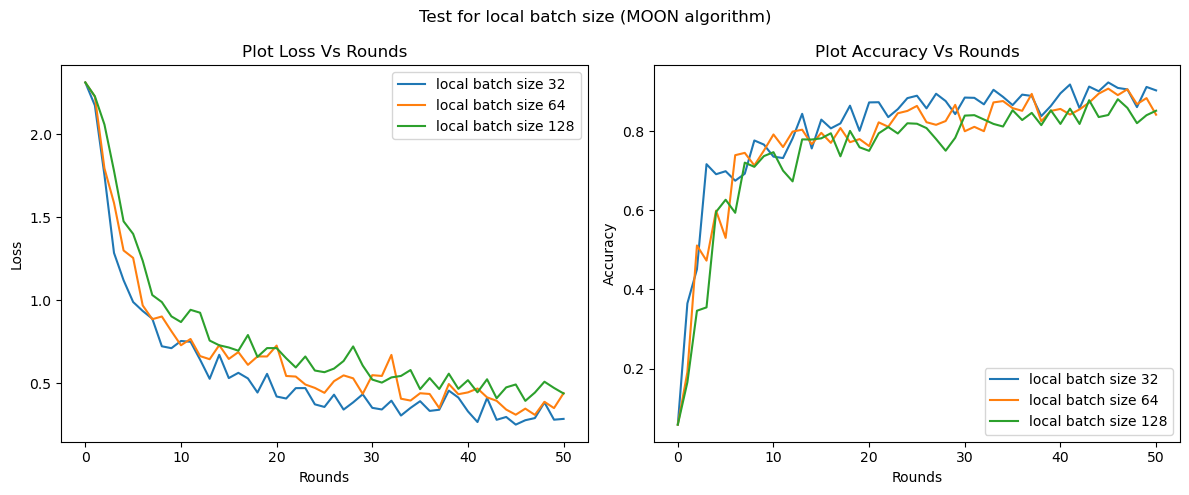

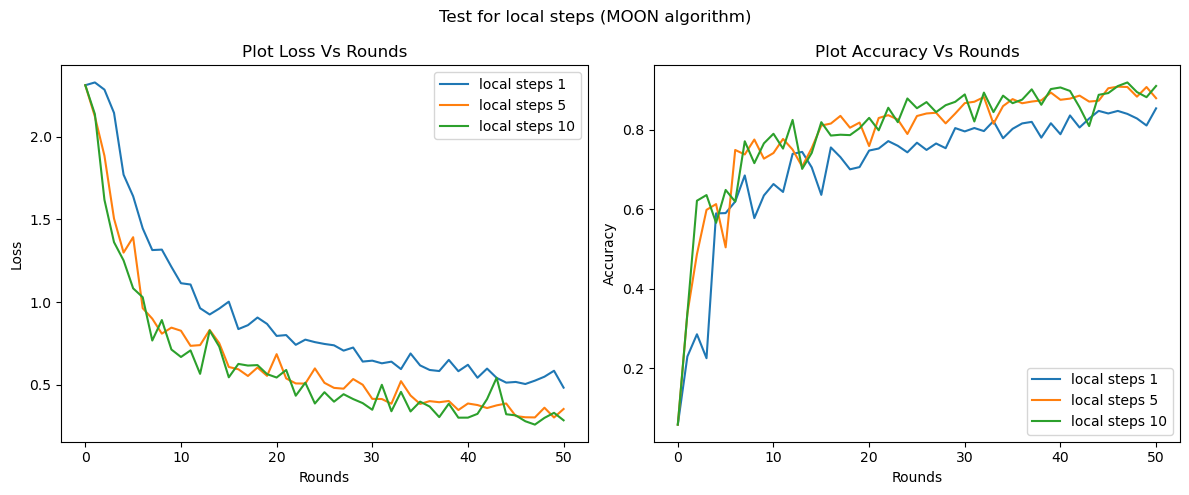

In [76]:
# Do everything
def do_everything(data_directory,save=False):
    directories = get_subdirs(data_directory)
    metrics_bunch, acc_table, loss_table = get_data(directories,data_directory)


    plots_dir = Path('plots')
    plots_dir.mkdir(exist_ok=True)
    metrics_dir = Path('metrics')
    metrics_dir.mkdir(exist_ok=True)
    for i in range(len(directories)):
        plot_graph(directories, i, acc_table, loss_table, save, plots_dir)
    for i in range(len(metrics_bunch.keys())):
        display_save_data_metrics(directories, metrics_bunch,i, metrics_dir, save)
    parameters = ['client number', 'join ratio', 'learning rate', 'local batch size', 'local steps']
    for i in parameters:
        compare_parameter(i, "MOON", acc_table,loss_table,plots_dir,save) 

do_everything('results_archive', True)